<a href="https://colab.research.google.com/github/kyochanpy/Google_Smartphone_Decimeter_Challenge/blob/main/filter/pfilter_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import numpy.random as rd
import pandas as pd

import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted", color_codes=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
train = pd.read_csv('/content/drive/MyDrive/GSDC/baseline_locations_train.csv')

In [6]:
#検証データとしてtrain.head(90)のデータを用いる。
df = train['latDeg'].head(90)

Text(0.5, 1.0, 'Train latDeg Data')

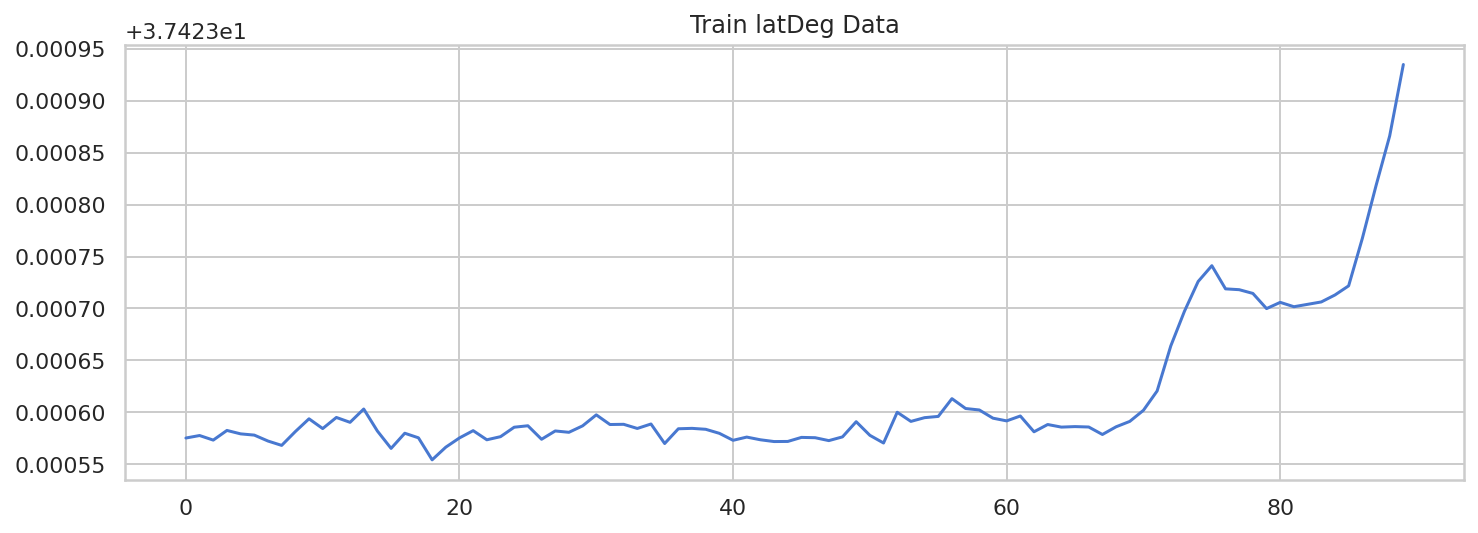

In [7]:
df.plot(figsize=(12,4))
plt.title("Train latDeg Data")

In [16]:
np.cumsum(9)

array([9])

In [88]:
class ParticleFilter(object):
    def __init__(self, y, n_particle, sigma_2):
        self.y = y
        self.n_particle = n_particle
        self.sigma_2 = sigma_2
        self.log_lokelihood = -np.inf

    def norm_likelihood(self, y , x, s2):
        return (np.sqrt(2*np.pi*s2))**(-1) * np.exp(-(y-x)**2/(2*s2))

    def F_inv(self, w_cumsum, idx, u):
        if np.any(w_cumsum < u) == False:
            return 0
        k = np.max(idx[w_cumsum < u])
        return k+1

    def resampling(self, weights):
        w_cumsum = np.cumsum(weights)
        idx = np.asanyarray(range(self.n_particle))
        k_list = np.zeros(self.n_particle, dtype=np.int32)

        for i, u in enumerate(rd.uniform(0, 1, size=self.n_particle)):
            k = self.F_inv(w_cumsum, idx, u)
            k_list[i] = k
        return k_list

    def resampling2(self, weights):
        idx = np.asanyarray(range(self.n_particle))
        u0 = rd.uniform(0, 1/self.n_particle)
        u = [1/self.n_particle*i + u0 for i in range(self.n_particle)]
        w_cumsum = np.cumsum(weights)
        k = np.asanyarray([self.F_inv(w_cumsum, idx, val) for val in u])
        return k

    def simulate(self, seed=42):
        rd.seed(seed)

        T =len(self.y)

        x = np.zeros((T+1, self.n_particle))
        x_resampled = np.zeros((T+1, self.n_particle))

        initial_x = rd.normal(df[0], 1e-5, size=n_particle)
        x_resampled[0] = initial_x
        x[0] = initial_x

        w = np.zeros((T, self.n_particle))
        w_normed = np.zeros((T, self.n_particle))
        l = np.zeros(T)

        for t in range(T):
            print("\r calculating -> t={}".format(t), end="")
            for i in range(self.n_particle):
                v = rd.normal(0, np.sqrt(self.sigma_2))
                x[t+1, i] = x_resampled[t, i] + v
                w[t, i] = self.norm_likelihood(self.y[t], x[t+1, i], self.sigma_2)
            w_normed[t] = w[t]/np.sum(w[t])
            l[t] = np.log(np.sum(w[t]))

            #k = self.resampling(w_normed[t])
            k = self.resampling(w_normed[t])
            x_resampled[t+1] = x[t+1, k]

        self.log_likelihood = np.sum(1) - T*np.log(n_particle)

        self.x = x
        self.x_resampled = x_resampled
        self.w = w
        self.w_normed = w_normed
        self.l = l
    
    def get_filtered_value(self):
        return np.diag(np.dot(self.w_normed, self.x[1:].T))

    def draw_graph(self):
        T = len(self.y)

        plt.figure(figsize=(16,8))
        plt.plot(range(T), self.y)
        plt.plot(self.get_filtered_value(), "g")

        for t in range(T):
            plt.scatter(np.ones(self.n_particle)*t, self.x[t], color="r", s=2, alpha=0.1)

        plt.title("sigma^2={0}, log likelihood={1:.3f}".format(self.sigma_2, self.log_likelihood))
        plt.show()

In [89]:
n_particle = 10 ** 3 * 5
sigma_2 = 1e-9

In [90]:
pf = ParticleFilter(df.values, n_particle, sigma_2)
pf.simulate()

 calculating -> t=89

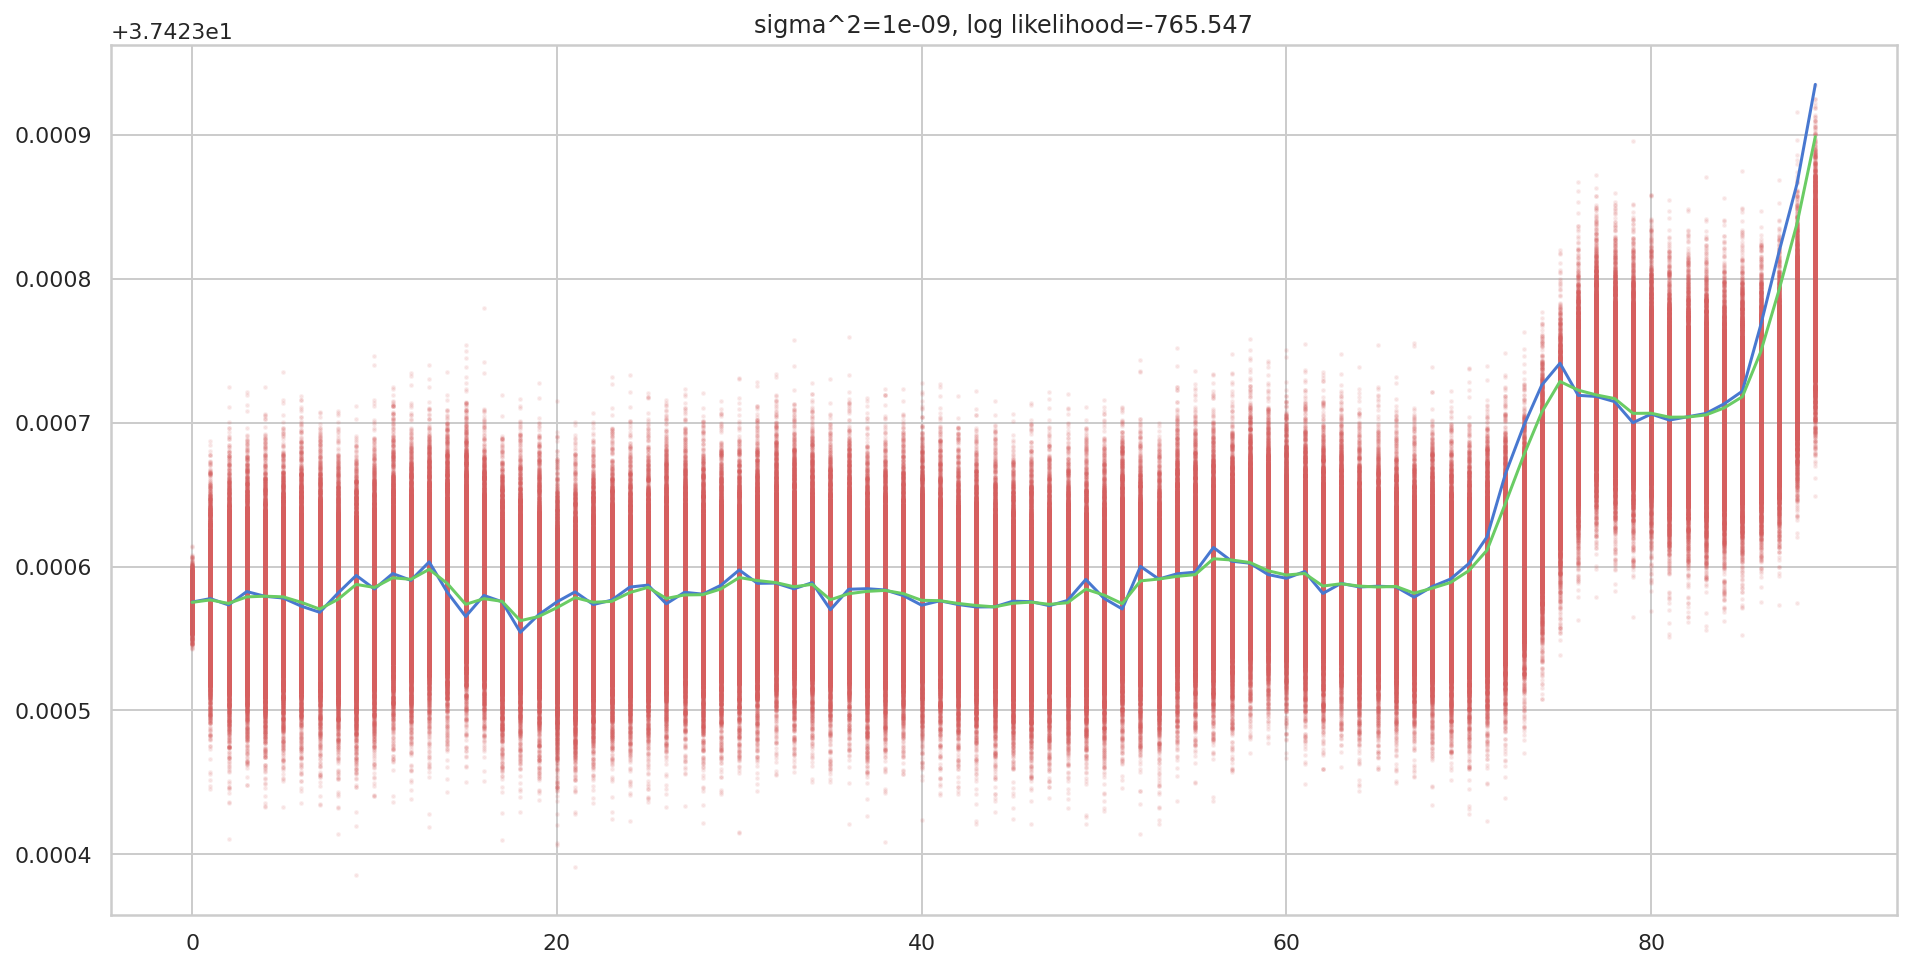

In [91]:
pf.draw_graph()

In [3]:
sum == 0

True

In [2]:
sum

0